In [13]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
import parallax

%matplotlib inline

In [73]:
def prior_r(r, L):
    return 1.0 / (2.0 * L**3) * r**2 * np.exp(-r/L)
    
def prior_r_CDF(r, L, x):
    prior_r_CDF = -np.exp(-r/L) * (2.*L**2 + 2.*L*r + r**2) / (2.*L**2) - x + 1.0
    
    if isinstance(r, np.ndarray):
        prior_r_CDF[r<0.0] = -x
    else:
        if r < 0: prior_r_CDF = -x
        
    return prior_r_CDF
    
def prior_pi(pi, L):
#    return 2.0 * L**3 * pi**2 * np.exp(1.0/(pi*L))
    return 1.0/(2.0 * L**3 * pi**4) * np.exp(-1.0/(pi*L))

/Library/Python/2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/Library/Python/2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in multiply


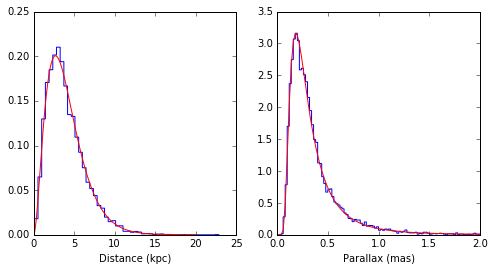

In [74]:
# Generate a bunch of r's using inverse sampling,
# then convert samples too parallax.
# Distribution of parallaxes should provide parallax prior

L = 1.35 # Exponential scale height from paper


fig, ax = plt.subplots(1, 2, figsize=(8,4))



# Randomly drawn from prior distribution
ran_x = np.zeros(10000)
ran_y = np.random.uniform(size=len(ran_x))
for i, y in zip(np.arange(len(ran_y)), ran_y):
    args = L, y
    sol = so.root(prior_r_CDF, [1.5], args=args)
    if sol.success is False: print args, sol
    ran_x[i] = sol.x[0]

ax[0].hist(ran_x, bins=50, histtype='step', normed=True)

# Analytic prior
ran_r = np.linspace(0, 20, 1000)
ran_prior_r = prior_r(ran_r, L)
ax[0].plot(ran_r, ran_prior_r, color='r')

ax[0].set_xlabel('Distance (kpc)')




# Now, move to parallax space. 
# We do this by taking random draws in r, and converting to parallax.
# We then plot distribution and compare to analytic estimate

# Random draws
ran_pi = 1.0 / ran_x
ax[1].hist(ran_pi, bins=100, histtype='step', normed=True, range=(0, 2.0))

# Analytic prior
ran_pi = np.linspace(0, 20, 1000)
ran_prior_pi = prior_pi(ran_pi, L)
ax[1].plot(ran_pi, ran_prior_pi, color='r')


ax[1].set_xlim(0.0, 2.0)
ax[1].set_xlabel('Parallax (mas)')

    
# ran_prior_r_CDF = prior_r_CDF(ran_r, L, 0.0)
# plt.plot(ran_r, ran_prior_r_CDF, color='r')

plt.show()